# HOUSING DATASET
## Dataset description :
The house-price of Harrison,D. and Rubinfeld, D.L 'Hedonic prices and the demand for clean air', J.Environ. Economics and Management, vol.5, 81-102, 1978. Used in Belsely, Kuh and Welsch, 'Regression diagnostics..', Wiley, 1980.

## Variables in order :
######  1. CRIM :
per capita crime rate by town
###### 2. ZN : 
proportion of residential land zoned for lots over 25,000 sq.ft
###### 3. INDUS : 
proportion of non-retail business acres per town
###### 4. CHAS : 
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
###### 5. NOX : 
nitric oxides concentration (parts per million)
###### 6. RM : 
average number of rooms per dwelling
###### 7. AGE : 
proportion of owner-occupied units built prior to 1940
###### 8. DIS : 
weighted distances to five Boston employment centres
###### 9. RAD : 
index of accessibility to radial highhways
###### 10. TAX : 
full-value property-tax rate per 10,000 dollars 
###### 11. PTRATIO : 
pupi-teacher ratio by town 
###### 12. B : 
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### 13. LSTAT : 
% lower status of the population
###### 14. MEDV : 
Median value of owner-occupied homes in $1000's 

* The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.
* The given data set having 506 rows and 14 columns

#### CONTENTS :
1. Attribute Information
2. Importing main libraries
3. Read Dataset
4. Checking shape, size, and information of the data
5. Descrptive statistics
6. Checking null values, unique values and duplicate values
7. Exploratory Data Analysis
  * missing values or null values
  * erroneous/wrong values
  * skewed data handling by using log, square root and boxcox transformations
  * outliers treatment by using InterQuartileRange method
8. Using  paiirplot to distribution of singlevariable and relationship between two variables
9. Spearman correlation
10. Distribution of numerical and categorical variables
11. Checking relation between targent variable and other 
12. Bar plot on numerical and categorical variables

## 1. Load the dataset into pandas and get a peek at the underlying data in the dataframe.

In [893]:
## IMPORTING REQUIRED LIBRARIES 

import pandas as pd
import numpy as np
## LIBRARIES FOR DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
## ALLOWS TO HANDLE THE WARNINGS
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import boxcox

In [894]:
## READING THE DATA SET BY USING PANDAS 
## AND GIVEN DATA IS NOT HAVING VARIABLE NAMES
## SO GIVING "columns" AS VARIABLE NAMES 
## BY USING "delimiter = r\s+" GIVING GIVEN VARIABLE NAMES TO EACH COLUMN

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] 
house = pd.read_csv("housing.csv", header = None, delimiter = r"\s+", names = columns, index_col = False)
pd.set_option("display.max_rows", None) 


In [895]:
## GETTING 1ST 5 OBSERVATIONS FROM DATA SET 

house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [896]:
## LOOKING THE TAIL OF THE DATA WHICH IS BOTTOM 5 OBSERVATIONS OF THE DATA

house.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


## 2. Provide the following information about the dataframe.
### 2. A. Dimensions of the dataframe

In [897]:
## LOOKING AT THE SHAPE OF THE DATA WHICH WILL HELP 
## TO GET NUMBER OF ROWS AND COLUMNS PRESENT IN THE DATA

house.shape

(506, 14)

In [898]:
## CHECKING THE TOTAL SIXE OF THE DATA

house.size

7084

### 2. B. Information about the schema

In [899]:
## GETTING THE TOTAL INFORMATION ABOUT THE DATA INCLUDING DATATYPE, COUNT OF ROWS PRESENT AND NULL VALUES COUNT 

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [900]:
## BY OBSERVING OF THE GIVEN DATA "CHAS" AND "RAD" VARIABLES ARE CATEGORICAL DATA TYPE
## CONVERTING INTO CATEGORICAL DATATYPE

house['CHAS'] = house['CHAS'].astype('category')
house['RAD'] = house['RAD'].astype('category')

In [901]:
## AFTER CONVERTING OF DATA TYPE AGAIN CHECKING THE INFORMATION

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


### 2. C. Statistical metrics of each column

In [902]:
# STATICALSUMMERY OF DATASET

house.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


### 3. A. Missing values or Null values

In [903]:
## CHECKING NULL VALUES

house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [904]:
## CHECKING THE NULL VALUES INFORMATION IN FORM OF "True" AND "False"

house.isnull().head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [905]:
## CHECKING UNIQUE VALUES 

house.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

### 3. B. Erroneous/wrong values

In [906]:
## CHECKING THAT IF ANY ERRORS OR IRRELEVENT DATA PRESENT IN DATASET

house['CRIM'] = pd.to_numeric(house['CRIM'], errors='coerce')
house['ZN'] = pd.to_numeric(house['ZN'], errors='coerce')
house['INDUS'] = pd.to_numeric(house['INDUS'], errors='coerce')
house['CHAS'] = pd.to_numeric(house['CHAS'], errors='coerce')
house['NOX'] = pd.to_numeric(house['NOX'], errors='coerce')
house['RM'] = pd.to_numeric(house['RM'], errors='coerce')
house['AGE'] = pd.to_numeric(house['AGE'], errors='coerce')
house['DIS'] = pd.to_numeric(house['DIS'], errors='coerce')
house['RAD'] = pd.to_numeric(house['RAD'], errors='coerce')
house['TAX'] = pd.to_numeric(house['TAX'], errors='coerce')
house['PTRATIO'] = pd.to_numeric(house['PTRATIO'], errors='coerce')
house['B'] = pd.to_numeric(house['B'], errors='coerce')
house['LSTAT'] = pd.to_numeric(house['LSTAT'], errors='coerce')
house['MEDV'] = pd.to_numeric(house['MEDV'], errors='coerce')
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [907]:
## CHECKING DUPLICATES

house.duplicated().sum()

0

### CHECKING THE SKEWNESS OF THE DATA


In [908]:
## CHECKING THE SKEWNESS OF THE DATA

house.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### 3.C. CHECKING THE DATA DISTRIBUTION :

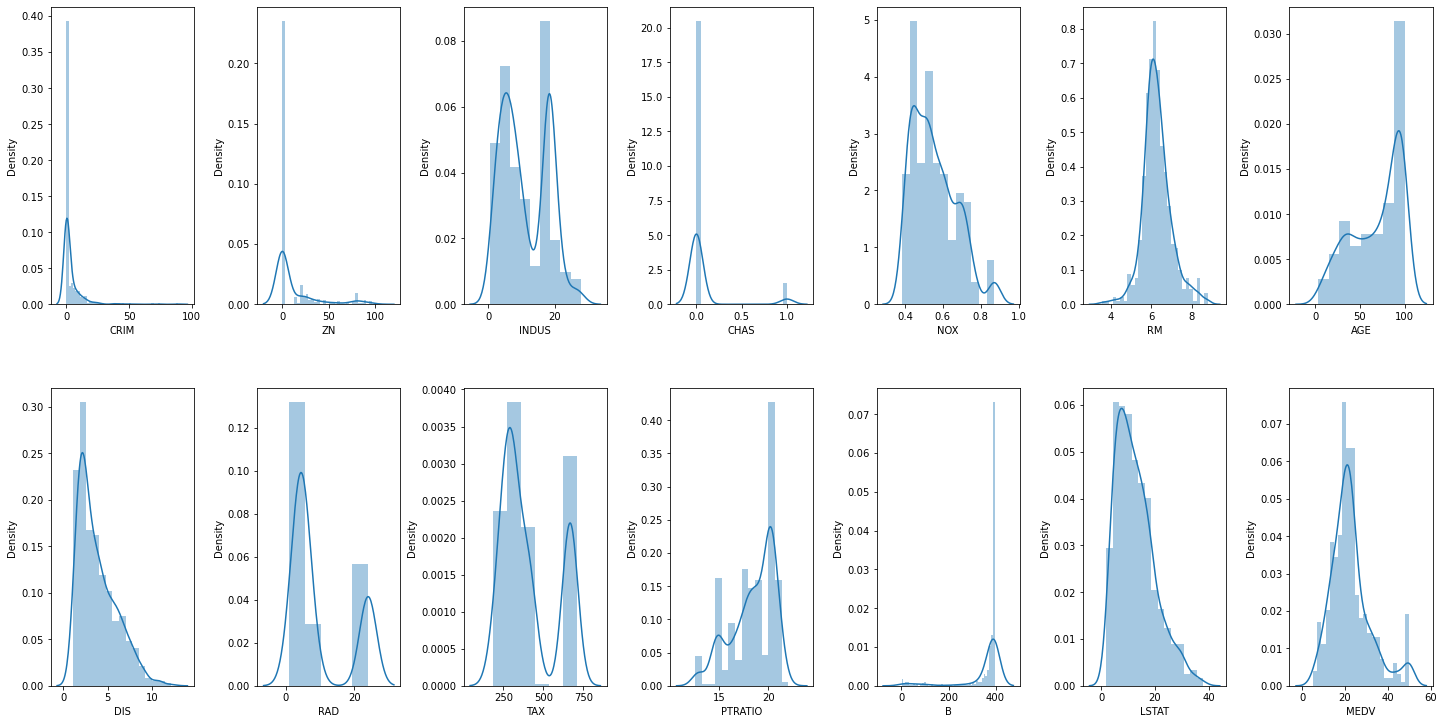

In [909]:
## CHECKING THAT DISTRIBUTION EACH VARIABLE 
## BY USING DISTPLOT
## DISTPLOT WILL HELP TO SEE THE DENSITY AND IT WILL SHOW THAT HOW THE DATA IS DISTRIBUTED
## IN THIS WE ARE GETTING ALL VARIABLES DISTRIBUTION BY USING 'FOR LOOP'

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in house.items():
    sns.distplot(value, ax = ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)   

### From the distribution plot we can see that 'CRIM','ZN' and 'B' variables are highly skewed and "PTRATIO" is also little left skewed. By using 'log' transwermation to transform data into normally distributed data 
    

## DEALING WITH SKEWED VARIABLES :

##  Transformations for "CRIM" variable :

### * Log transformation :   

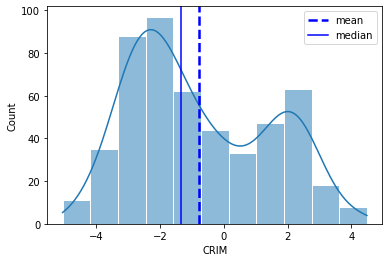

In [910]:
## BY USING LOG TRANSFORMATION TRANSFORMING THE SKEWDDATA INTO NORMAL DISTRIBUTION

log_crim = np.log(house['CRIM'])
sns.histplot(log_crim, kde = True, edgecolor = 'white')
plt.axvline(x=log_crim.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=log_crim.median(),color='blue',label='median')
plt.legend()

### * Squareroot transofromation :

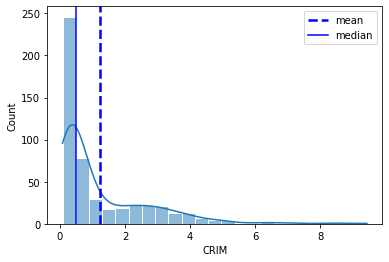

In [911]:
## AND SAME FOR SQUAREROOT TRANSFORMATION 
## TRANSFORMING THE SKEWDATA INTO NORMALL DISTRIBUTION   
sqrt_crim = np.sqrt(house['CRIM'])
sns.histplot(sqrt_crim, kde = True, edgecolor = 'white')
plt.axvline(x=sqrt_crim.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=sqrt_crim.median(),color='blue',label='median')
plt.legend()

### * Boxcox transofrmation :

<AxesSubplot:ylabel='Density'>

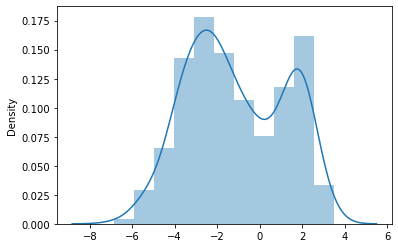

In [912]:
## BY USING BOXCOX TRANSFORMATION WE CAN TRANSFORM THE SKEWD DATA INTO NORMAL DISTRIBUTION

crim_boxcox = boxcox(house.iloc[:, 0])[0]
sns.distplot(crim_boxcox)

## Transformations for "ZN" variable :

### * Log transformation :   

* IN THIS WE ARE NOT GOING TO CHECK BOXCOX TRANSFORMATION. BEACAUSE FOR BOXCOX TRANSFORMATION DATA SHOULD BE IN POSITIVE. BUT IN THIS "ZN" VARIABLE THE DATA HAVING ZEROS. THATS WHY WE ARE NOT CHECKING.

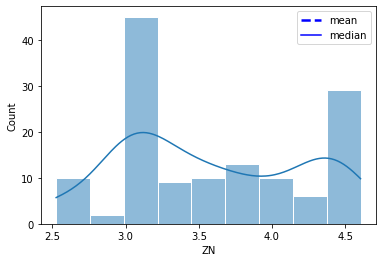

In [913]:
## BY USING LOG TRANSFORMATION TRANSFORMING THE SKEWDDATA INTO NORMAL DISTRIBUTION

log_zn = np.log(house['ZN'])
sns.histplot(log_zn, kde = True, edgecolor = 'white')
plt.axvline(x=log_zn.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=log_zn.median(),color='blue',label='median')
plt.legend()

### * Squareroot transformation :  

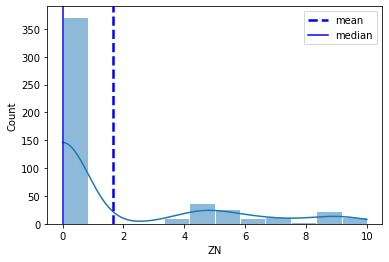

In [914]:
## TRANSFORMING THE SKEWDATA INTO NORMALL DISTRIBUTION  BY USING SQUARE ROOT TRANSFORMATION

sqrt_zn = np.sqrt(house['ZN'])
sns.histplot(sqrt_zn, kde = True, edgecolor = 'white')
plt.axvline(x=sqrt_zn.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=sqrt_zn.median(),color='blue',label='median')
plt.legend()

## Transformations for 'B' variable :

### * Log transformation :   

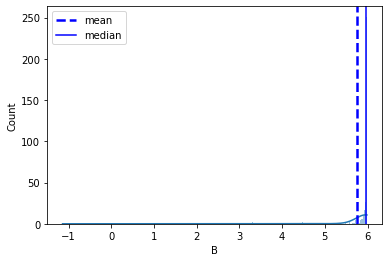

In [915]:
## BY USING LOG TRANSFORMATION TRANSFORMING THE SKEWDDATA INTO NORMAL DISTRIBUTION

log_b = np.log(house['B'])
sns.histplot(log_b, kde = True, edgecolor = 'white')
plt.axvline(x=log_b.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=log_b.median(),color='blue',label='median')
plt.legend()

### * Squareroot transformation :   

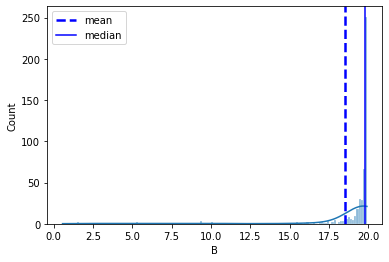

In [916]:
## TRANSFORMING THE SKEWDATA INTO NORMALL DISTRIBUTION  BY USING SQUARE ROOT TRANSFORMATION

sqrt_b= np.sqrt(house['B'])
sns.histplot(sqrt_b, kde = True, edgecolor = 'white')
plt.axvline(x=sqrt_b.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=sqrt_b.median(),color='blue',label='median')
plt.legend()

### * Boxcox transofrmation :


<AxesSubplot:ylabel='Density'>

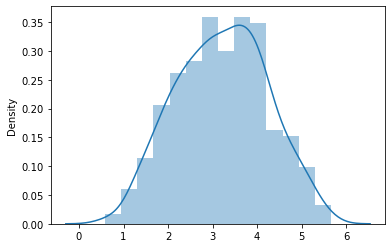

In [917]:
## BY USING BOXCOX TRANSFORMATION WE CAN TRANSFORM THE SKEWD DATA INTO NORMAL DISTRIBUTION

b_boxcox = boxcox(house.iloc[:, 12])[0]
sns.distplot(b_boxcox)

## Transformations for 'PTRATIO' variable :

### * Log transformation :  

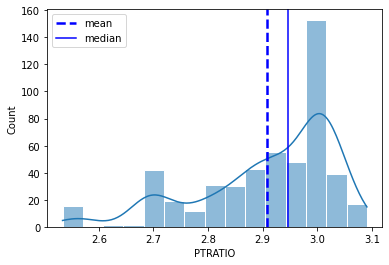

In [918]:
## BY USING LOG TRANSFORMATION TRANSFORMING THE SKEWDDATA INTO NORMAL DISTRIBUTION

log_PTRATIO = np.log(house['PTRATIO'])
sns.histplot(log_PTRATIO, kde = True, edgecolor = 'white')
plt.axvline(x=log_PTRATIO.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=log_PTRATIO.median(),color='blue',label='median')
plt.legend()

### * Squareroot transformation :  

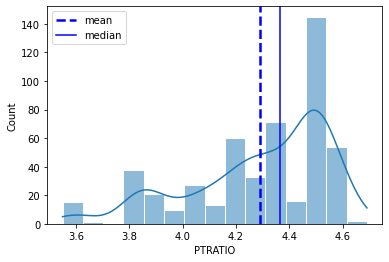

In [919]:
## TRANSFORMING THE SKEWDATA INTO NORMALL DISTRIBUTION  BY USING SQUARE ROOT TRANSFORMATION

sqrt_PTRATIO= np.sqrt(house['PTRATIO'])
sns.histplot(sqrt_PTRATIO, kde = True, edgecolor = 'white')
plt.axvline(x=sqrt_PTRATIO.mean(), ls='--', lw=2.5,color='blue', label='mean')
plt.axvline(x=sqrt_PTRATIO.median(),color='blue',label='median')
plt.legend()

### * Boxcox transofrmation

<AxesSubplot:ylabel='Density'>

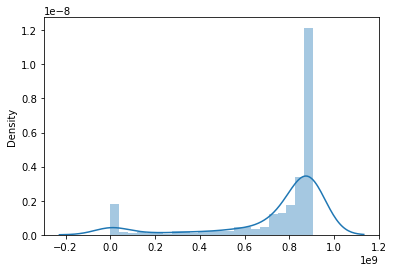

In [920]:
## BY USING BOXCOX TRANSFORMATION WE CAN TRANSFORM THE SKEWD DATA INTO NORMAL DISTRIBUTION

PTRATIO_boxcox = boxcox(house.iloc[:, 11])[0]
sns.distplot(PTRATIO_boxcox)

##### As we can see above by using three transformation approaches we have transformed the skewed variable into normal distribution and taken as a new dataset that is for checking. From that information we have to decide which transformation approach is giving best result and we can take that approach and replace into our original data.
##### And in my opinion for "CRIM" VARIABLE Log transformation giving best result
##### For "ZN" variable square root transformation is better approach
##### For "B" variable boxcox transformation is seems to good approach
##### For "PTRATIO" variable boxcox transformation is good approach

In [921]:
## PERFORMING LOG TRANSFORMATION ON VARIABLE "CRIM"
### AFTER LOG TRANSFORMATION DATA IS NORMALLY DISTRIBUTED WHICH IS  BETTER THAN PREVIOUS

house["CRIM"] = np.log(house['CRIM'])

In [922]:
## PERFORMING SQUAREROOT TRANSFORMATION ON "ZN"
## IT IS GIVING BETTER RESULT

house["ZN"] = np.sqrt(house['ZN'])

In [923]:
## PERFORMING BOXCOX TRANSFORMATION ON "B"
## THE DISTRIBUTION IS BETTER THAN PREVIOUS ONE WITH BOXCOX ONLY

house["B"] = boxcox(house.iloc[:, 12])[0]

In [924]:
## BY USING BOXCOX TRANSFORMATION ON "PTRATIO" IS GIVING BEST RESULT TO GET NORMAL DISTRIBUTION TO DATA 

house['PTRATIO'] = boxcox(house.iloc[:, 11])[0]

In [925]:
## AFTER REPLACING THE TRANSFORMED DATA INTO THOSE VARIABLES, CHECK 1ST 5 OBSERVATIONS

house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-5.064036,4.242641,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,0.918095,1.938257,4.98,24.0
1,-3.600502,0.000000,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,1.809490,2.876983,9.14,21.6
2,-3.601235,0.000000,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,0.630314,1.640387,4.03,34.7
3,-3.430523,0.000000,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,0.221033,1.222396,2.94,33.4
4,-2.672924,0.000000,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,1.012822,2.036925,5.33,36.2


###  AFTER PERFORMING THE TRANFORMATION APPROACH CHECKING THE DISTRIBUTION OF DATA :

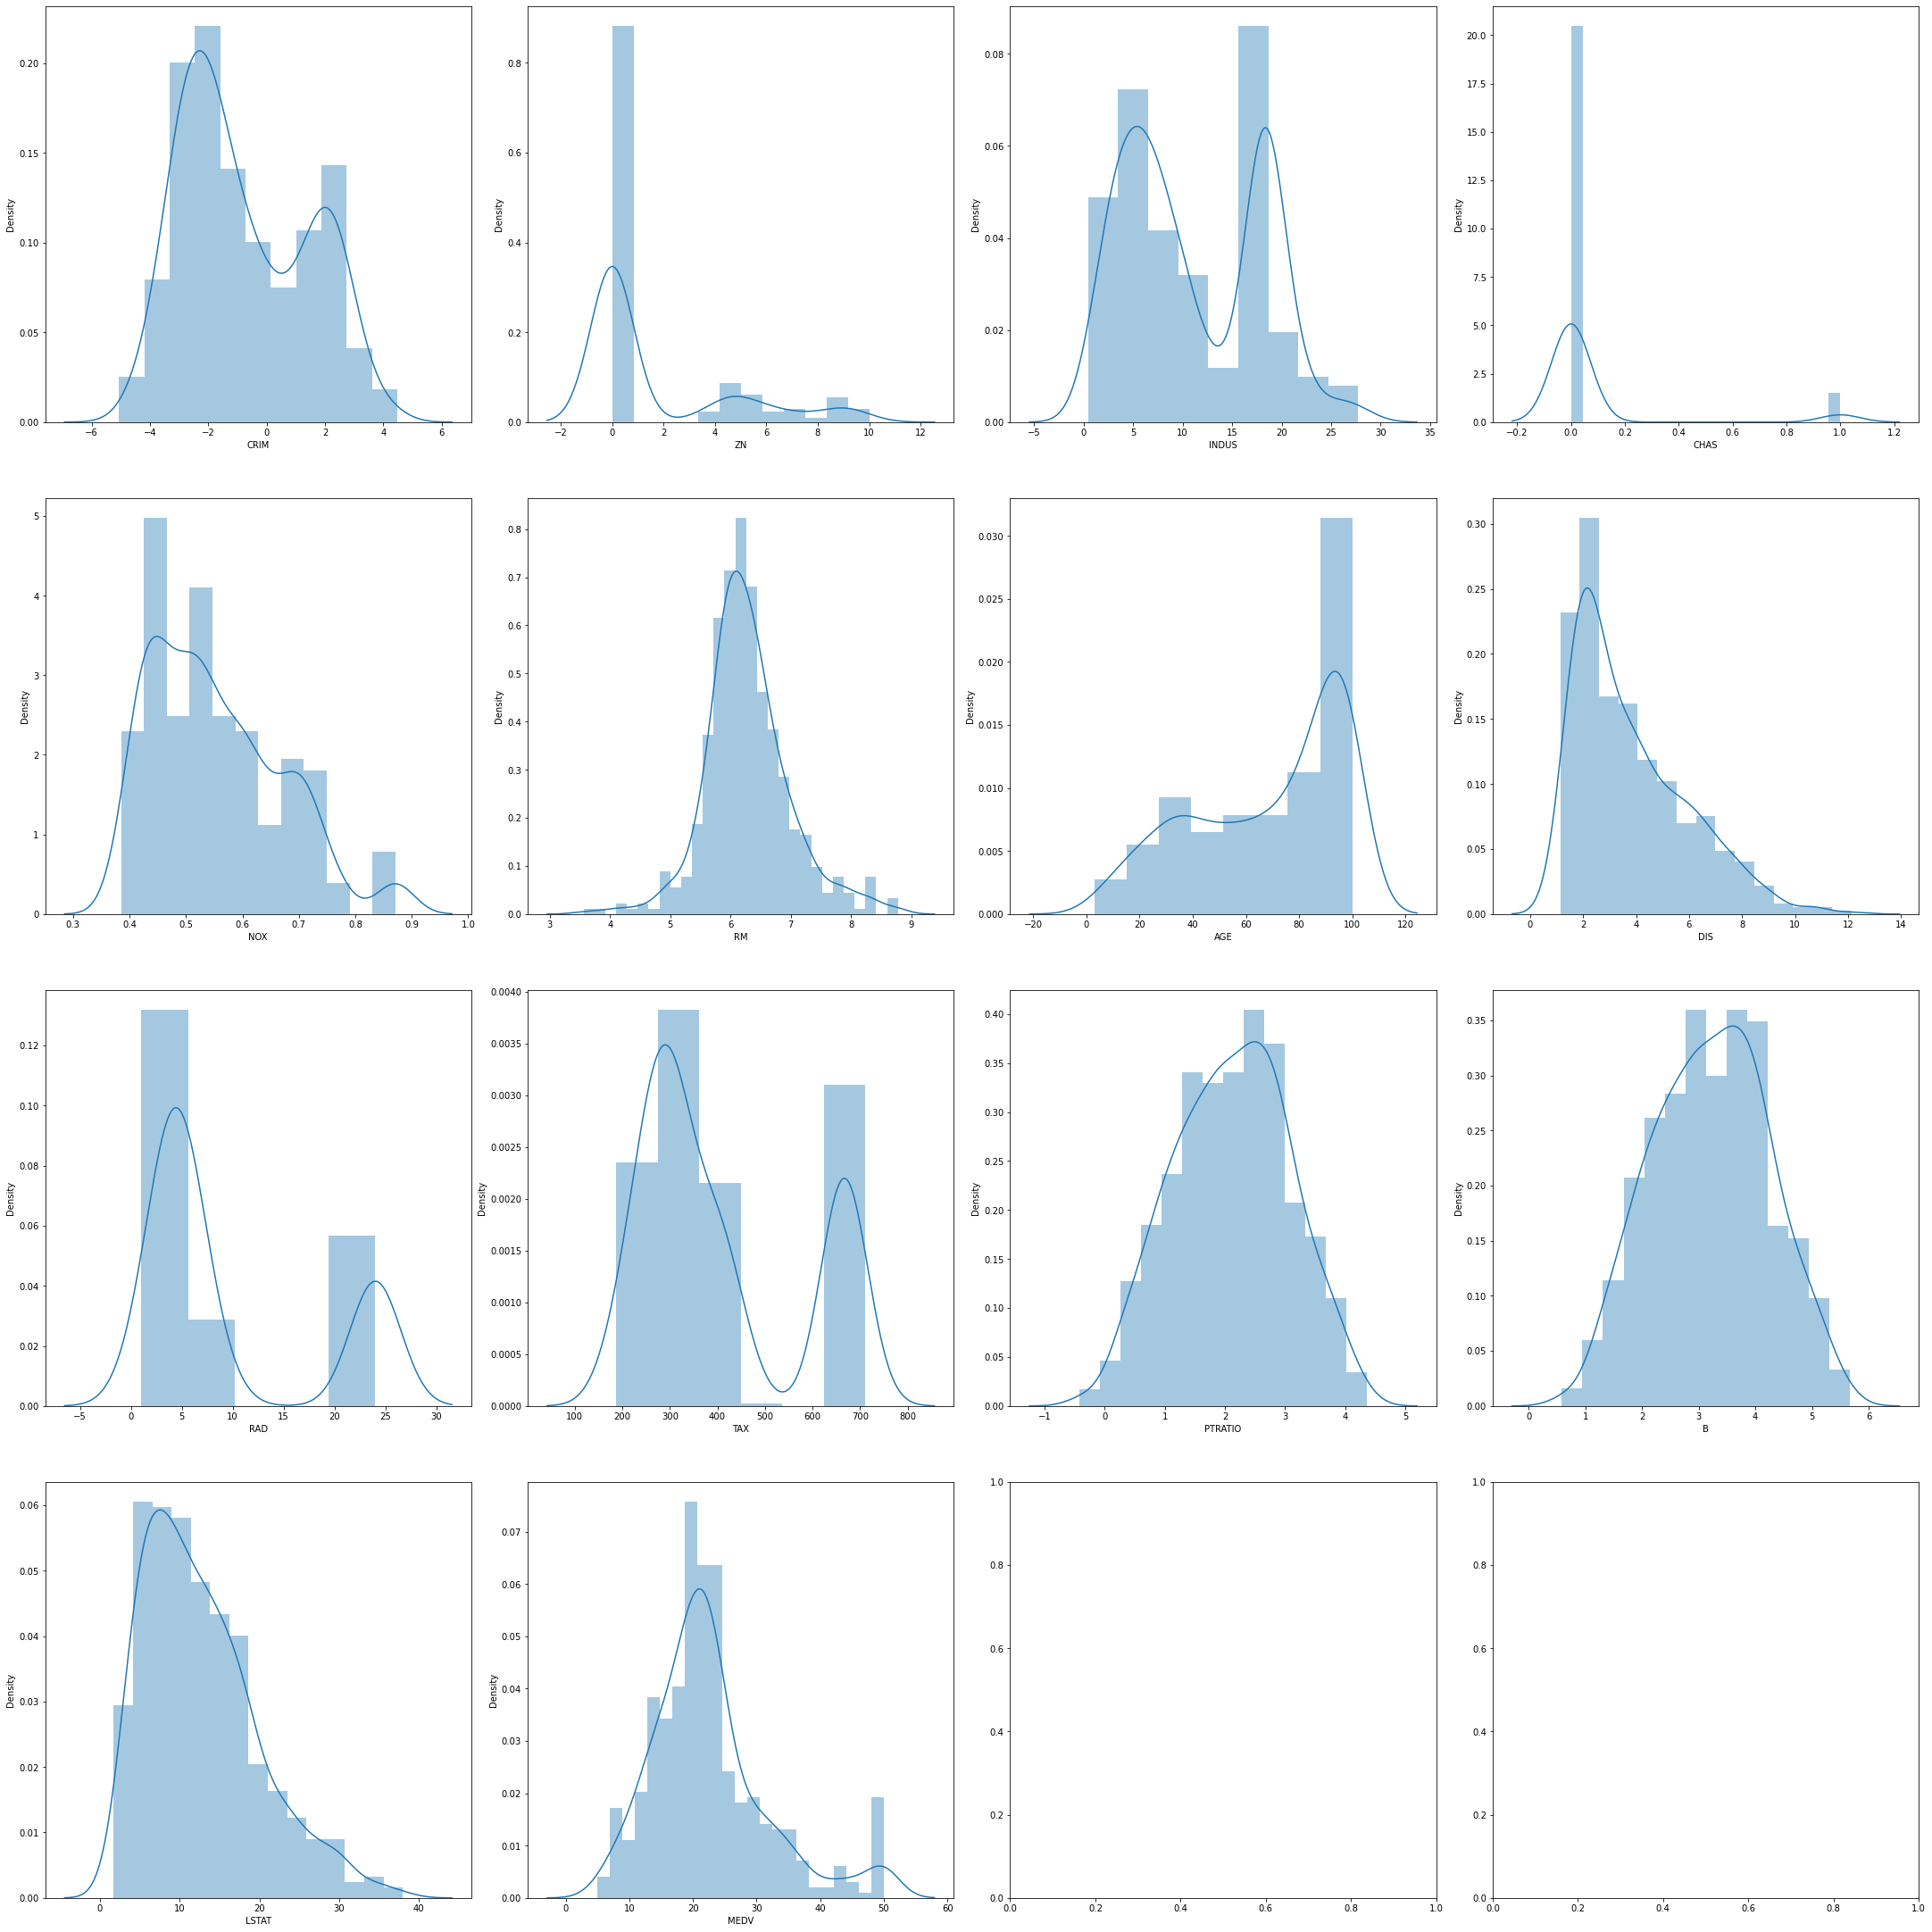

In [926]:
## AND AGAIN CHECK THE DISTRIBUTION OF DATA 
## AFTER TRANSFORMATION OF SOME VARIABLES

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(30,30))
index = 0
ax = ax.flatten()

for col, value in house.items():
    sns.distplot(value, ax = ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7,h_pad=5.0)   

In [927]:
## AND AGAIN CHECKING THE SKEWNESS 

house.skew()

CRIM       0.405934
ZN         1.476293
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.071397
B         -0.027886
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### 3. D. CHECKING FOR OUTLIERS :

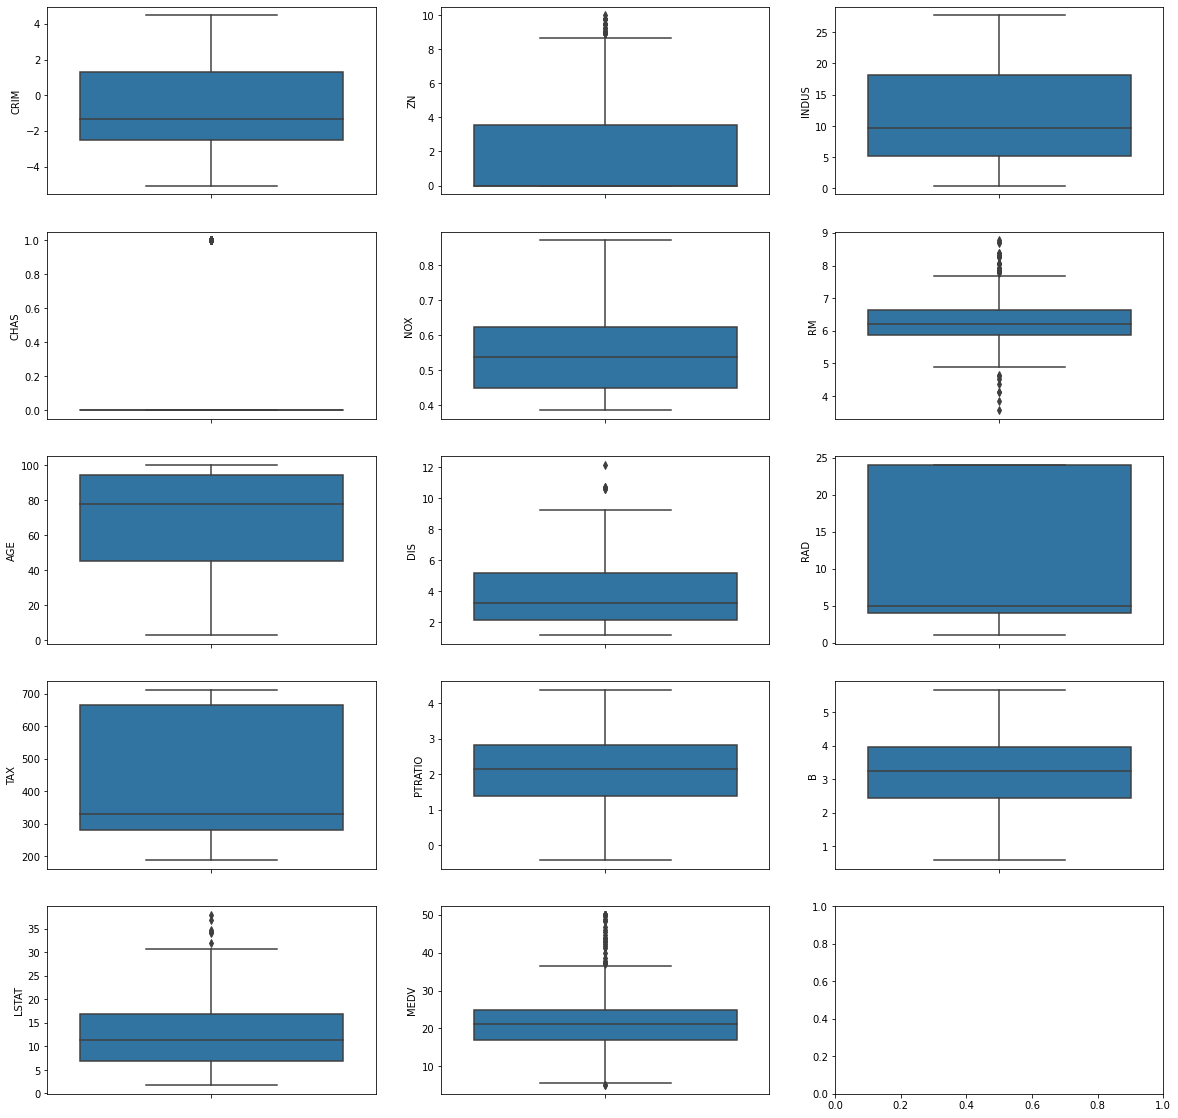

In [928]:
## CHECKING THE OUTLIERS PRESENT IN EACH VARIABLE
## AGAIN USING FOR LOOP TO SEE ALL PLOTS IN BETTER VIEW

fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20,20))
index = 0
ax = ax.flatten()

for col, value in house.items():
    sns.boxplot(y = col, data = house, ax = ax[index])
    index +=1

##  TREATING OUTLIERS :

* As we can see in above boxplot variables - ZN,RM,DIS,LSTAT AND MEDV are having outliers

##### In this outliers treating process I am going to use InterQuartileRange method 

## OUTLIER TREATMNET FOR 'ZN' VARIABLE :

<AxesSubplot:xlabel='ZN'>

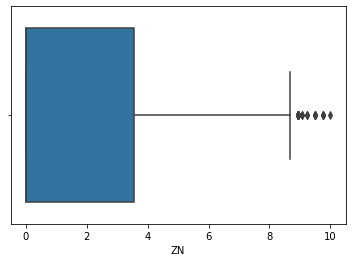

In [929]:
## BY USING BOXPLOT CHECKING THE OUTLIERS IN "ZN" 

sns.boxplot(house['ZN'])

<AxesSubplot:xlabel='ZN'>

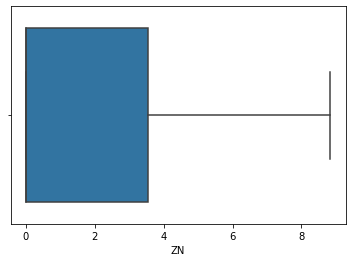

In [948]:
## first finding IQR value
## after that getting lower_whisker and Upper_whisker values
## by using these treating the outliers
## and again using Boxplot checking outliers

Q1 = np.percentile(house['ZN'], 25, interpolation = 'midpoint')
Q2 = np.percentile(house['ZN'], 50, interpolation = 'midpoint')
Q3 = np.percentile(house['ZN'], 75, interpolation = 'midpoint')
IQR = Q3-Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 *IQR
house['ZN'] = np.where(house['ZN']>upper_whisker, upper_whisker, house['ZN'])
sns.boxplot(house['ZN'])


## OUTLIER TREATMENT FOR 'RM' VARIABLE :

<AxesSubplot:xlabel='RM'>

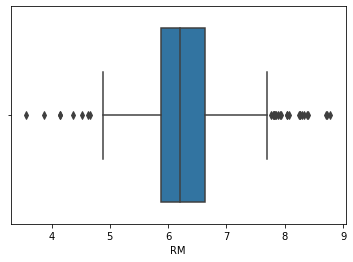

In [931]:
## BY USING BOXPLOT CHECKING THE OUTLIERS

sns.boxplot(house['RM'])

<AxesSubplot:xlabel='RM'>

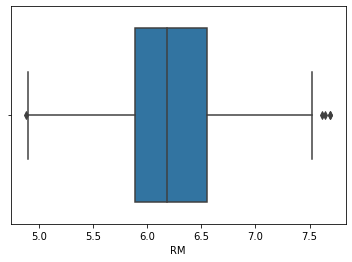

In [932]:
## first finding IQR value
## after that getting lower_whisker and Upper_whisker values
## by using these treating the outliers
## and again using Boxplot checking outliers

Q1 = np.percentile(house['RM'], 25, interpolation = 'midpoint')
Q2 = np.percentile(house['RM'], 50, interpolation = 'midpoint')
Q3 = np.percentile(house['RM'], 75, interpolation = 'midpoint')
IQR = Q3-Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 *IQR
house['RM'] = house['RM'][(house['RM']>= lower_whisker) & (house['RM']<=upper_whisker)]
sns.boxplot(house['RM'])

## OUTLIER TREATMENT FOR 'DIS' VARIABLE :

<AxesSubplot:xlabel='DIS'>

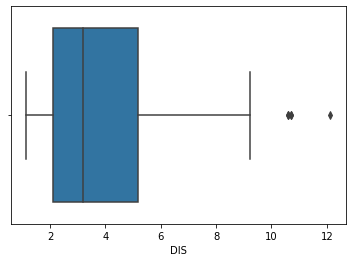

In [933]:
## BY USING BOXPLOT CHECKING THE OUTLIERS

sns.boxplot(house['DIS'])

<AxesSubplot:xlabel='DIS'>

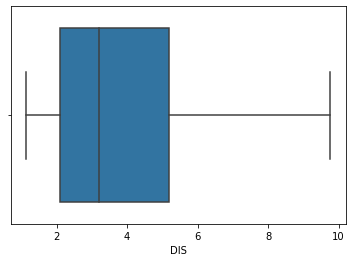

In [934]:
## first finding IQR value
## after that getting lower_whisker and Upper_whisker values
## by using these treating the outliers
## and again using Boxplot checking outliers

Q1 = np.percentile(house['DIS'], 25, interpolation = 'midpoint')
Q2 = np.percentile(house['DIS'], 50, interpolation = 'midpoint')
Q3 = np.percentile(house['DIS'], 75, interpolation = 'midpoint')
IQR = Q3-Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 *IQR
house['DIS'] = np.where(house['DIS']>upper_whisker, upper_whisker, house['DIS'])
sns.boxplot(house['DIS'])

## OUTLIER TREATMENT FOR 'LSTAT' VARIABLE :

<AxesSubplot:xlabel='LSTAT'>

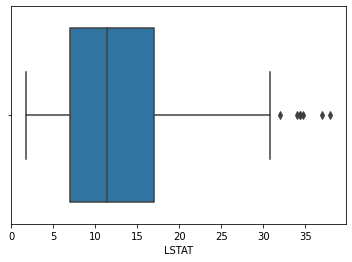

In [935]:
## BY USING BOXPLOT CHECKING THE OUTLIERS

sns.boxplot(house['LSTAT'])

<AxesSubplot:xlabel='LSTAT'>

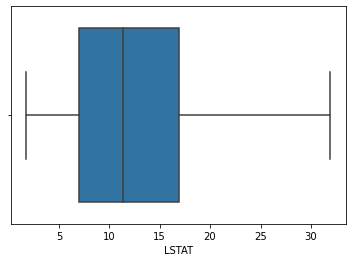

In [936]:
## first finding IQR value
## after that getting lower_whisker and Upper_whisker values
## by using these treating the outliers
## and again using Boxplot checking outliers

Q1 = np.percentile(house['LSTAT'], 25, interpolation = 'midpoint')
Q2 = np.percentile(house['LSTAT'], 50, interpolation = 'midpoint')
Q3 = np.percentile(house['LSTAT'], 75, interpolation = 'midpoint')
IQR = Q3-Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 *IQR
house['LSTAT'] = np.where(house['LSTAT']>upper_whisker, upper_whisker, house['LSTAT'])
sns.boxplot(house['LSTAT'])

## OUTLIER TREATMENT FOR 'MEDV' VARIABLE :

<AxesSubplot:xlabel='MEDV'>

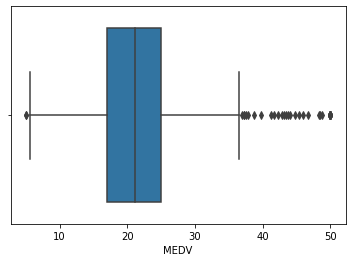

In [937]:
## BY USING BOXPLOT CHECKING THE OUTLIERS

sns.boxplot(house['MEDV'])

<AxesSubplot:xlabel='MEDV'>

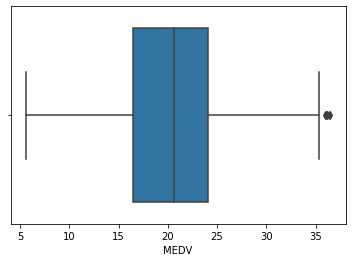

In [938]:
## first finding IQR value
## after that getting lower_whisker and Upper_whisker values
## by using these treating the outliers
## and again using Boxplot checking outliers

Q1 = np.percentile(house['MEDV'], 25, interpolation = 'midpoint')
Q2 = np.percentile(house['MEDV'], 50, interpolation = 'midpoint')
Q3 = np.percentile(house['MEDV'], 75, interpolation = 'midpoint')
IQR = Q3-Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 *IQR
house['MEDV'] = house['MEDV'][(house['MEDV']>= lower_whisker) & (house['MEDV']<=upper_whisker)]
sns.boxplot(house['MEDV'])

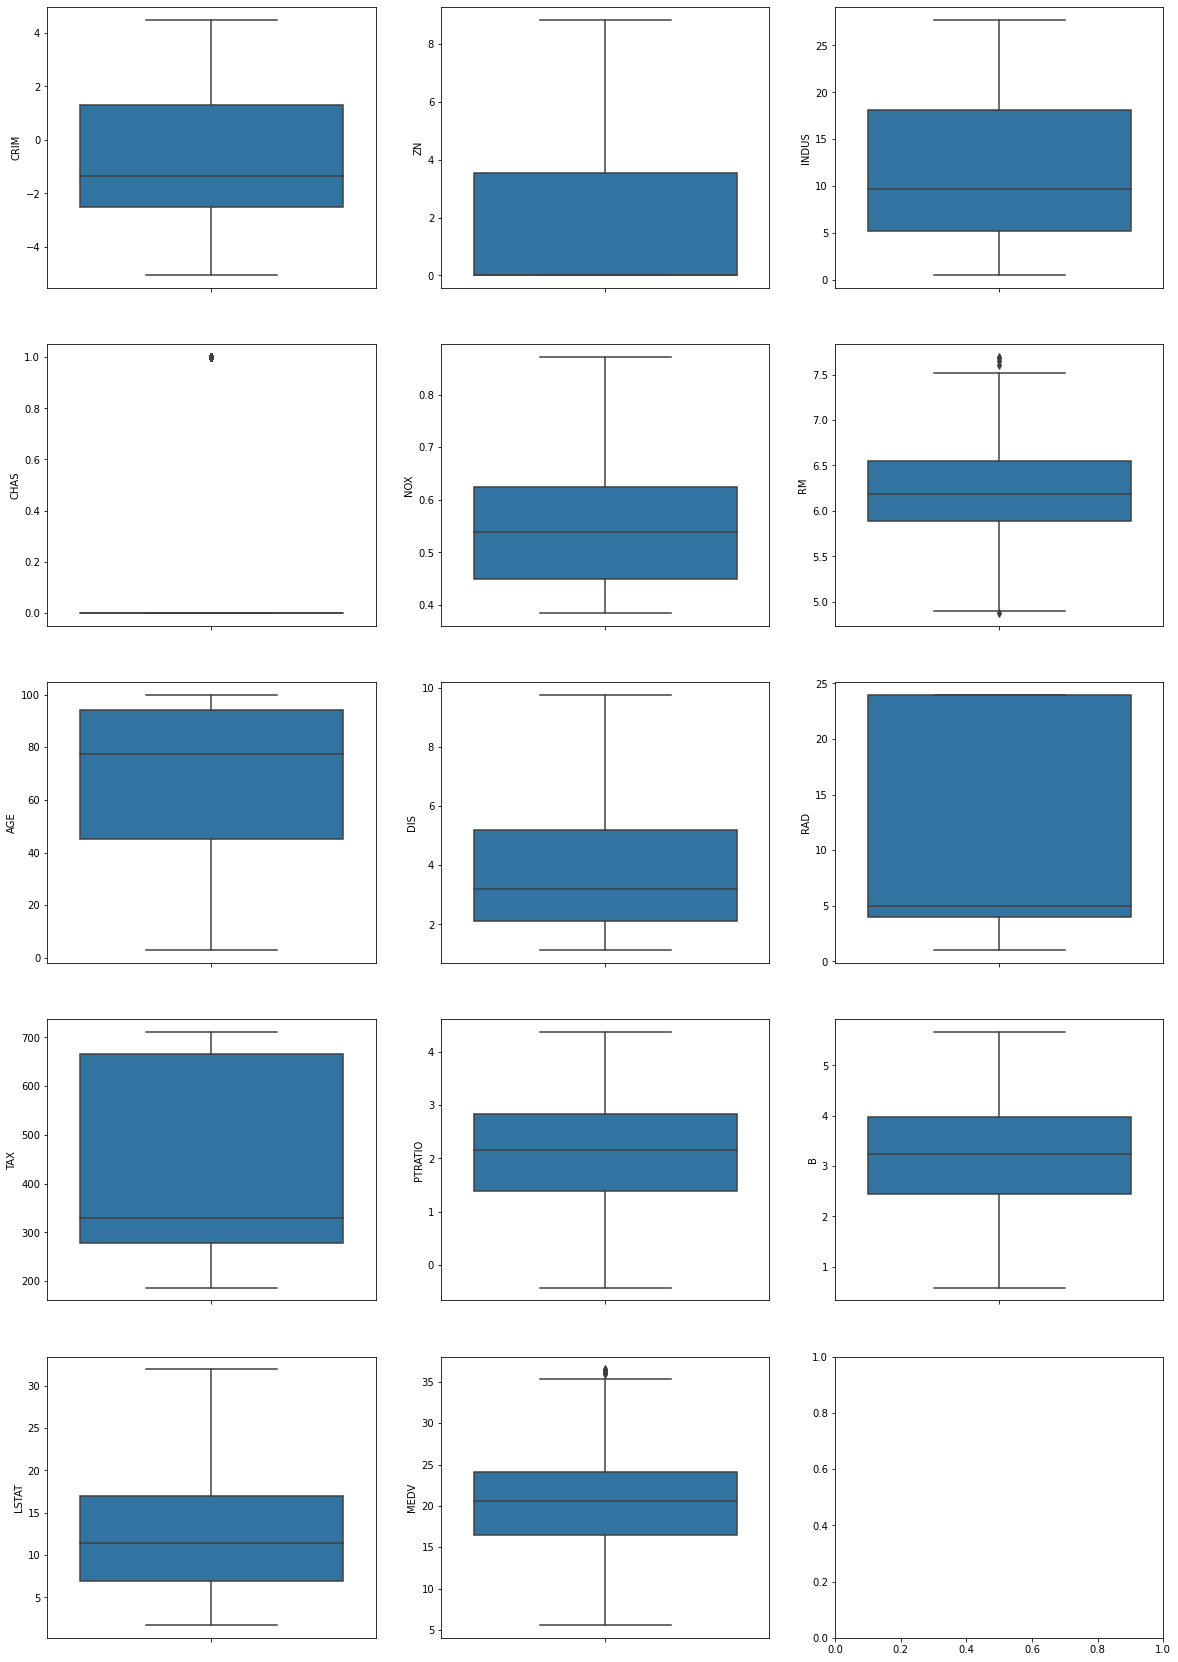

In [939]:
## AFTER TREATING OF OUTLIERS CHECKING OUTLIERS FOR ALL VARIABLE

fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20,30))
index = 0
ax = ax.flatten()

for col, value in house.items():
    sns.boxplot(y = col, data = house, ax = ax[index])
    index +=1

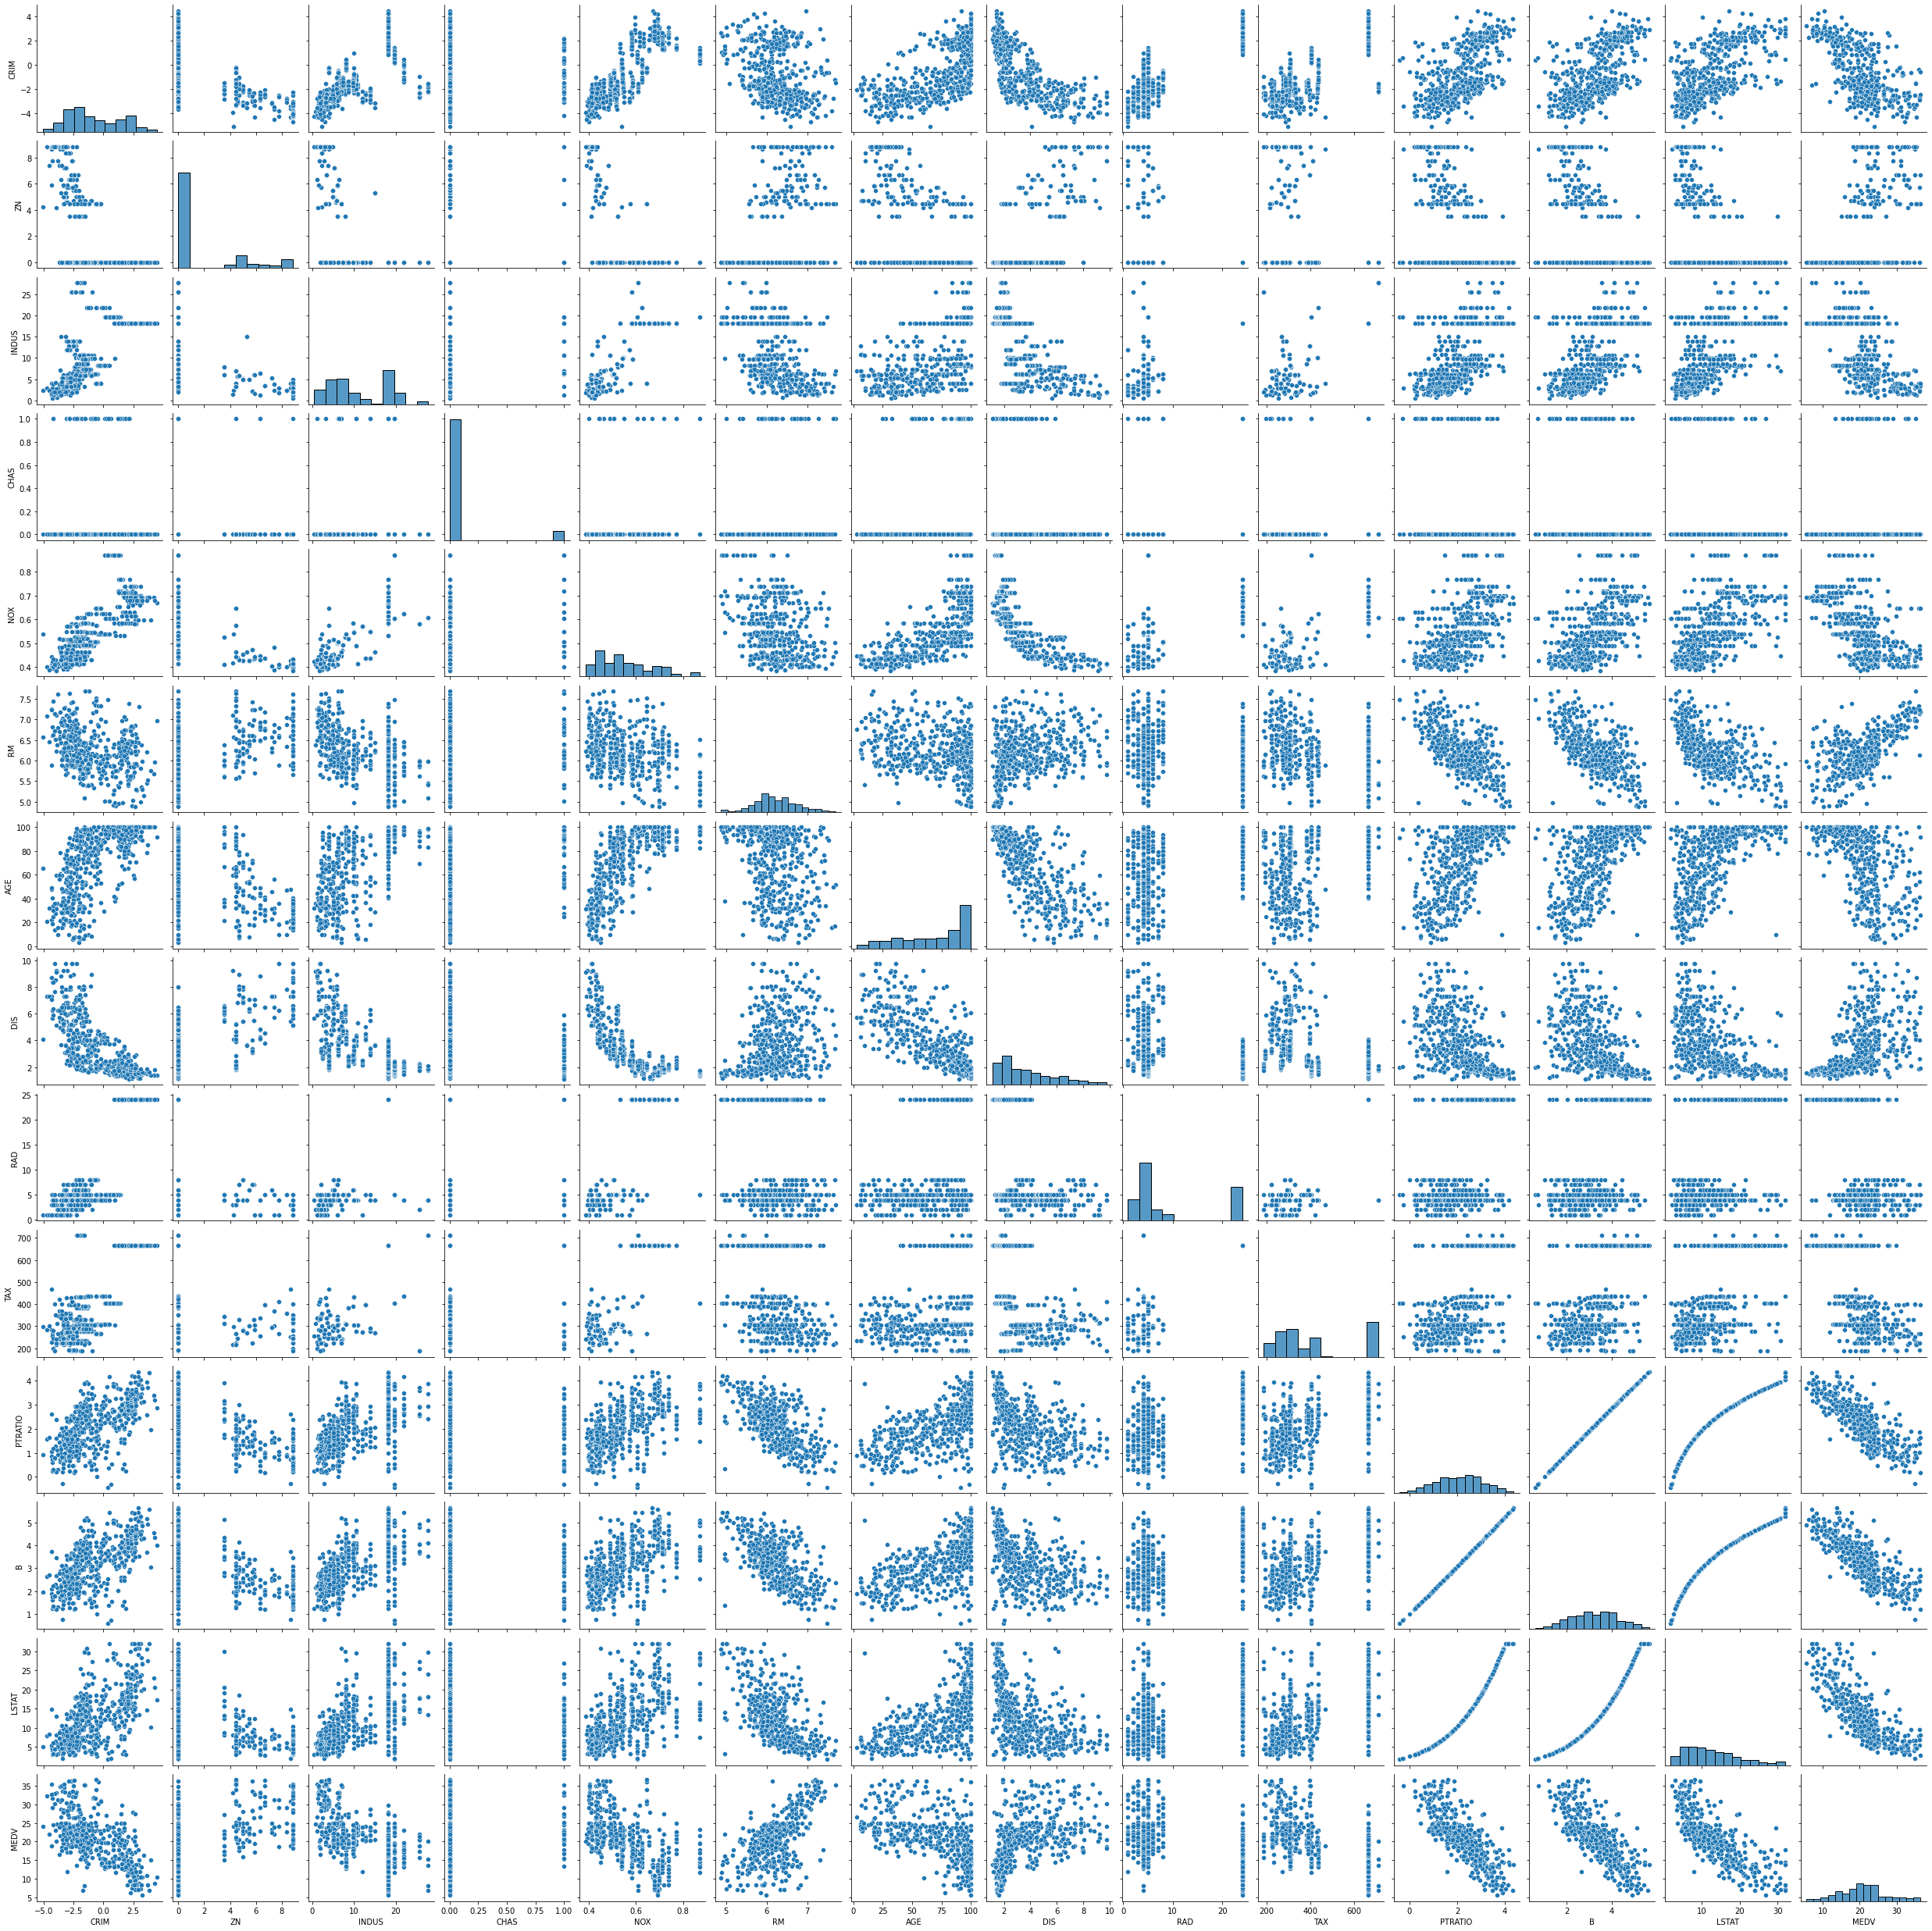

In [940]:
## PAIR PLOT IS ALLOW US TO SEE BOTH DISTRIBUTION OF SINGLE
## AND RELATIONSHIP BETWEEN TWO VARIABLES

sns.pairplot(house)

<AxesSubplot:>

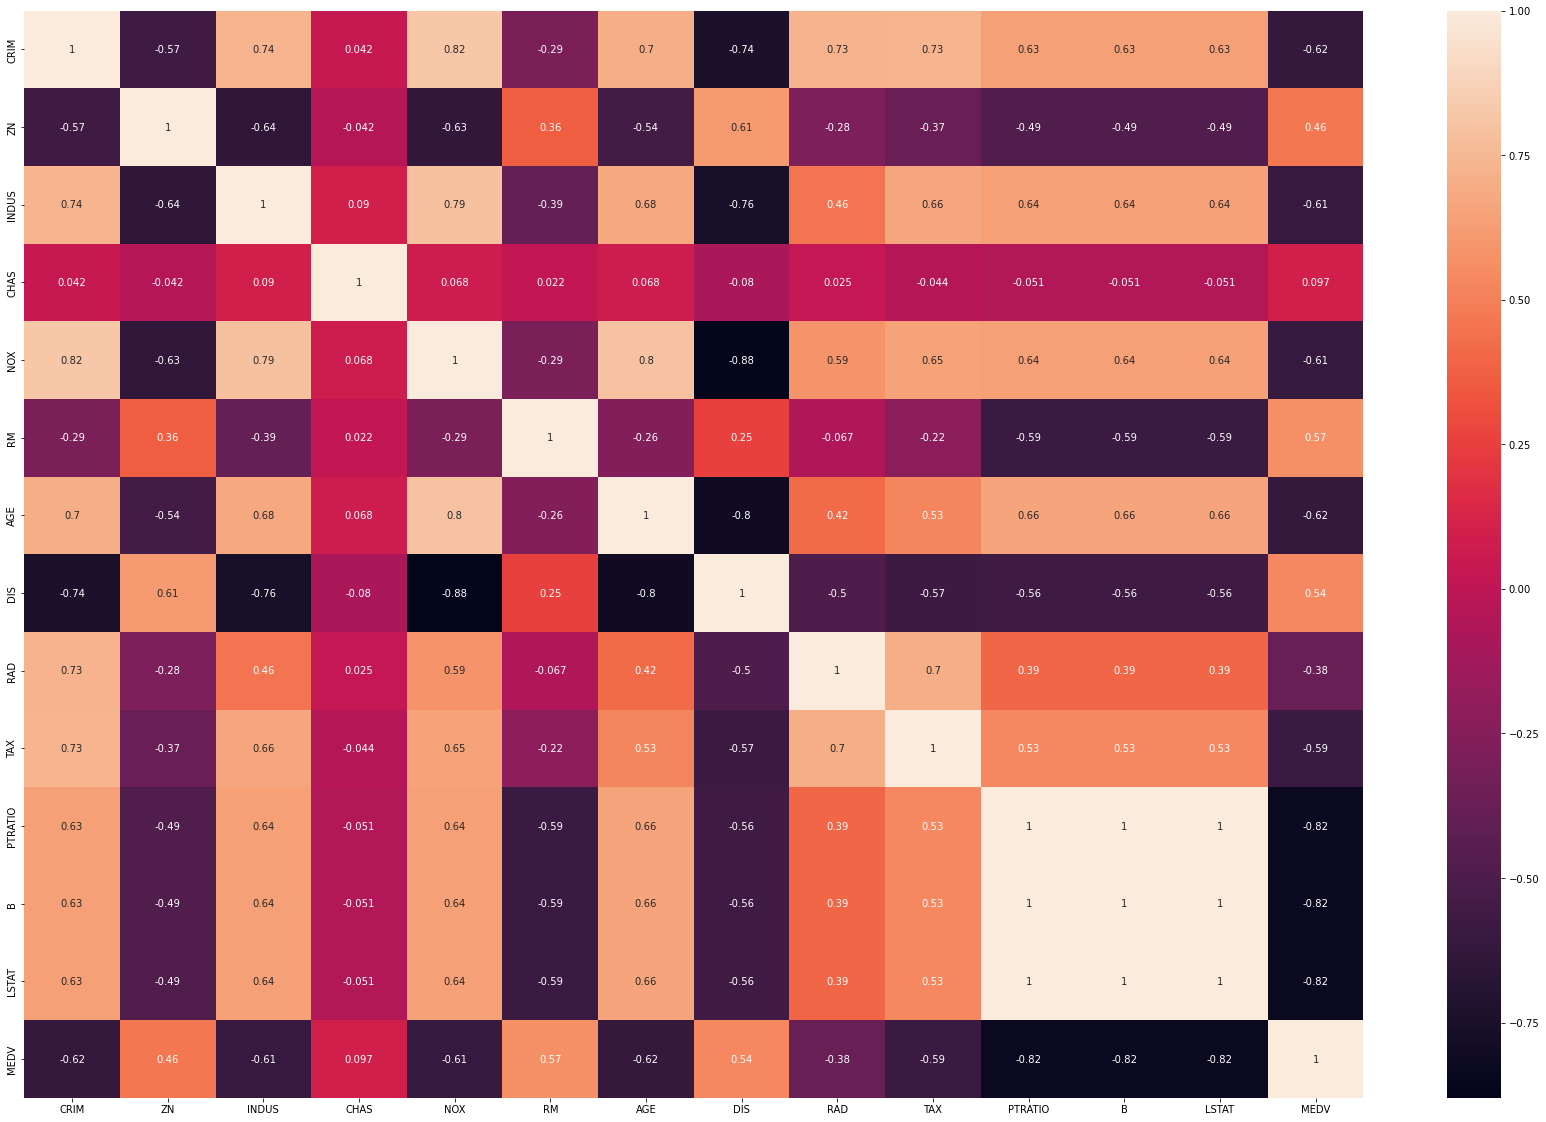

In [941]:
# CHECKING SPEARMAN CORRELATION

plt.figure(figsize = (30,20))
sns.heatmap(house.corr(method = 'spearman'), annot = True)

##### The correlation coefficient ranges from -1 to 1. If the value is close to  1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

In [942]:
## ALSO CHECKING THE CORRELATION BY USING "corr" FUNCTION

house.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.543961,0.730821,0.028496,0.788616,-0.283676,0.658284,-0.687964,0.853407,0.828234,0.606658,0.609099,0.628141,-0.628230
ZN,-0.543961,1.000000,-0.585430,-0.043147,-0.550023,0.378781,-0.588991,0.696992,-0.345742,-0.372587,-0.487144,-0.486219,-0.444246,0.473235
INDUS,0.730821,-0.585430,1.000000,0.062938,0.763651,-0.384093,0.644779,-0.713282,0.595129,0.720760,0.607229,0.608841,0.608207,-0.612220
CHAS,0.028496,-0.043147,0.062938,1.000000,0.091203,0.033168,0.086518,-0.099440,-0.007368,-0.035587,-0.069052,-0.068043,-0.053277,0.097053
NOX,0.788616,-0.550023,0.763651,0.091203,1.000000,-0.312085,0.731470,-0.776222,0.611441,0.668023,0.587546,0.589229,0.595673,-0.569014
RM,-0.283676,0.378781,-0.384093,0.033168,-0.312085,1.000000,-0.265562,0.239819,-0.127761,-0.214785,-0.620890,-0.619927,-0.585347,0.614818
AGE,0.658284,-0.588991,0.644779,0.086518,0.731470,-0.265562,1.000000,-0.753527,0.456022,0.506456,0.614337,0.615533,0.606767,-0.557098
DIS,-0.687964,0.696992,-0.713282,-0.099440,-0.776222,0.239819,-0.753527,1.000000,-0.500244,-0.540521,-0.493733,-0.495463,-0.502823,0.444956
RAD,0.853407,-0.345742,0.595129,-0.007368,0.611441,-0.127761,0.456022,-0.500244,1.000000,0.910228,0.472298,0.474207,0.489187,-0.504338
TAX,0.828234,-0.372587,0.720760,-0.035587,0.668023,-0.214785,0.506456,-0.540521,0.910228,1.000000,0.533778,0.535620,0.545612,-0.590236


##### Here our target variable is MEDV. As we can observe  from above heat map, DIS and RM are positive correlation and LSTAT, B and PTRATIO variables are strong negatively related with target variable MEDV

### 4. D. NUMERICAL DATA VS NUMERICAL DATA PLOTS

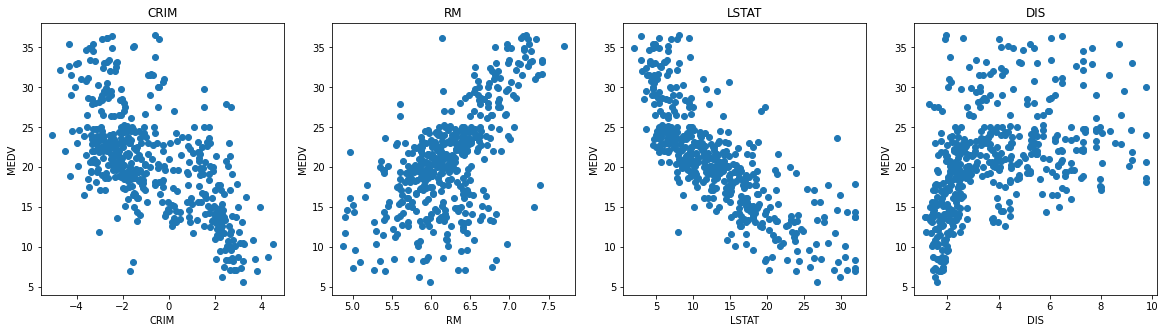

In [943]:
## Based on above information, Now cheching the relation between two varaibles by using "scatterplot"
## BY USING SCATTER PLOT CHECKING RELATIONSHIP BETWEEN 
## ONE TARGET VARIBLE "MEDV" TO OTHER 4 VARIABLES AT A TIME
## IN THIS USED FOR LOOP TO GET ALL 4 PLOTS AT A TIME

plt.figure(figsize = (20,5))
features = ['CRIM', 'RM', 'LSTAT','DIS']
target = house['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = house[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### 4. A. DISTRIBUTION OF NUMERICAL DATA

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

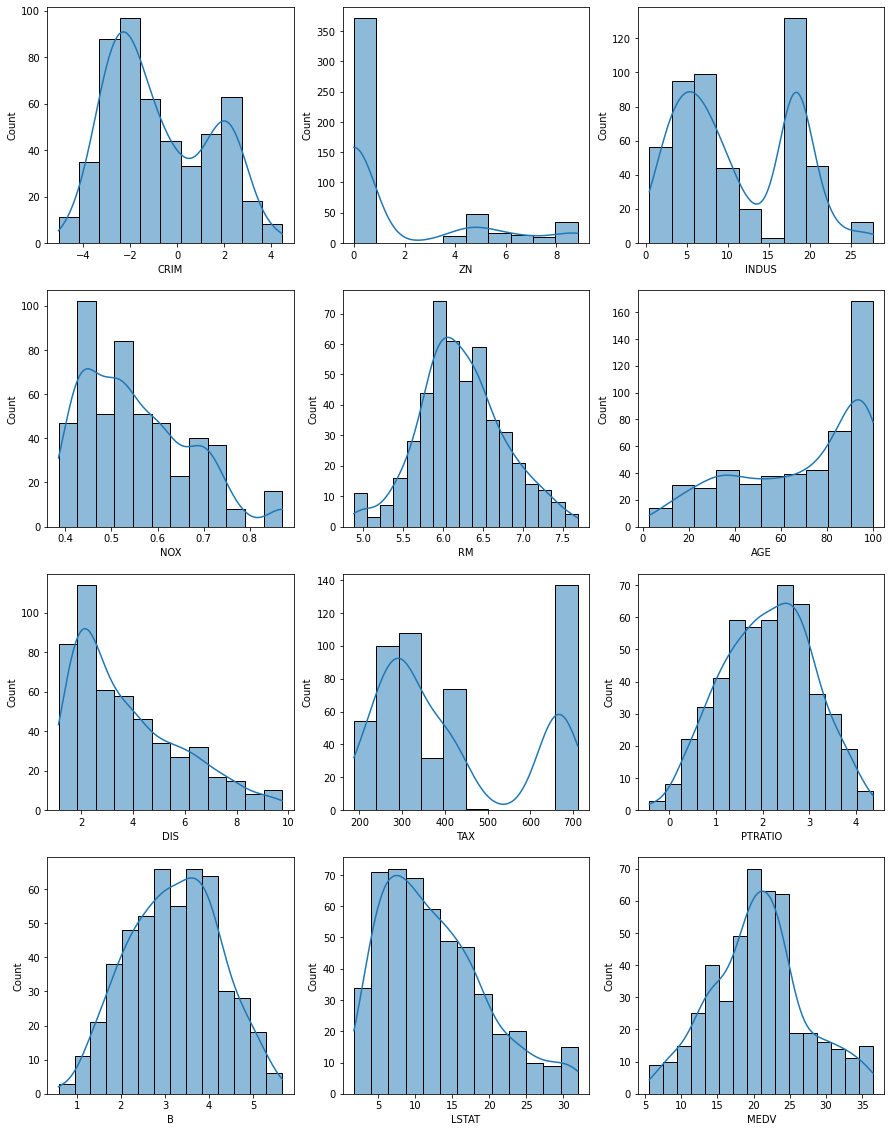

In [944]:
## BY USING HISTOGRAM PLOT PERFORMING THE DISTRIBUTION OF ALL NUMERICAL DATA

plt.figure(figsize = (15,20))
plt.subplot(4,3,1)
sns.histplot(house, x= "CRIM",kde = True)

plt.subplot(4,3,2)
sns.histplot(house, x= "ZN",kde = True)

plt.subplot(4,3,3)
sns.histplot(house, x= "INDUS",kde = True)

plt.subplot(4,3,4)
sns.histplot(house, x= "NOX",kde = True)

plt.subplot(4,3,5)
sns.histplot(house, x= "RM",kde = True)

plt.subplot(4,3,6)
sns.histplot(house, x= "AGE",kde = True)

plt.subplot(4,3,7)
sns.histplot(house, x= "DIS",kde = True)

plt.subplot(4,3,8)
sns.histplot(house, x= "TAX",kde = True)

plt.subplot(4,3,9)
sns.histplot(house, x= "PTRATIO",kde = True)

plt.subplot(4,3,10)
sns.histplot(house, x= "B",kde = True)

plt.subplot(4,3,11)
sns.histplot(house, x= "LSTAT",kde = True)

plt.subplot(4,3,12)
sns.histplot(house, x= "MEDV",kde = True)

### 4. B. DISTRIBUTION OF CATEGORICAL DATA

<AxesSubplot:xlabel='RAD', ylabel='Count'>

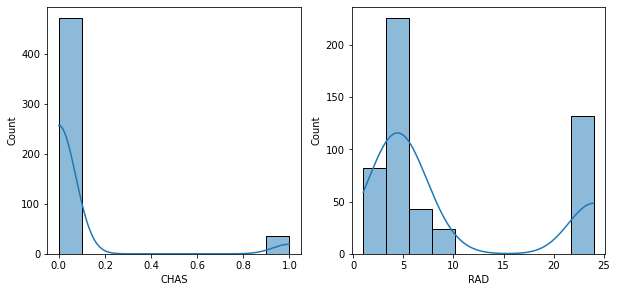

In [945]:
## BY USING HISTOGRAM PLOT PERFOMING THE DISTRIBUTION OF CATEGORICAL DATA

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(house, x= "CHAS",kde = True)

plt.subplot(2,2,2)
sns.histplot(house, x= "RAD",kde = True)

### 4. C. NUMERICALL DATA VS CATEGORICAL DATA

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

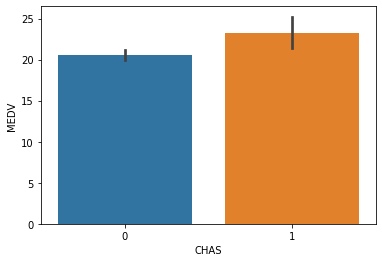

In [949]:
## by using bar plot checking that how categorical data depending on numerical data 

sns.barplot(x = 'CHAS', y = 'MEDV', data = house)

<AxesSubplot:xlabel='RAD', ylabel='MEDV'>

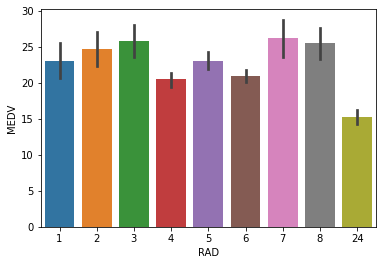

In [950]:
## by using bar plot checking that how categorical data depending on numerical data 

sns.barplot(x = 'RAD', y = 'MEDV', data = house)